# Salaries of Oregon State Agencies 2015 - 2017

#### Data Set Summary: This data set contains the salaries for job positions in state agencies for the state of Oregon, from 2015 to 2017.

The data set was obtained from https://data.oregon.gov/Revenue-Expense/Salaries-Of-State-Agencies-Multi-Year/4cmg-5yp4/data, the original source is located https://www.oregon.gov/transparency/Pages/state_workforce.aspx

It is important for us as citizens to understand not only how state budgets are allocated, but also to understand how state agencies allocate capital to job positions. As citizens whom provide that capital we need to advocate for the most efficent use of these funds. Salary data is the first step to holding state agencies accountable as it gives us as citizens the ability to ask a very simple question.

Does the agencies labor value system allign with the collective citizen's value system align?

If it does not, it is up to the agency to justify that missaligntment thus providing transparency and comprimise.

In laymens terms, is the state paying too much or possibly too little for a job or set of jobs?





In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import scipy

In [35]:
%cd C:\Users\Zak White\My Datasets
    #input your working directory above
df = pd.read_csv('Salaries_Of_State_Agencies_-_Multi-Year.csv') #data set downloaded from https://data.oregon.gov/Revenue-Expense/Salaries-Of-State-Agencies-Multi-Year/4cmg-5yp4/data


C:\Users\Zak White\My Datasets


In [3]:
print(df.head().append(df.tail()))

        FISCAL YEAR     AGENCY #                  AGENCY TITLE  \
0              2017        12000  ACCOUNTANCY, OREGON BOARD OF   
1              2017        12000  ACCOUNTANCY, OREGON BOARD OF   
2              2017        12000  ACCOUNTANCY, OREGON BOARD OF   
3              2017        12000  ACCOUNTANCY, OREGON BOARD OF   
4              2017        12000  ACCOUNTANCY, OREGON BOARD OF   
107045         2015        41500       YOUTH AUTHORITY, OREGON   
107046         2015        41500       YOUTH AUTHORITY, OREGON   
107047         2015        41500       YOUTH AUTHORITY, OREGON   
107048         2015        41500       YOUTH AUTHORITY, OREGON   
107049         2015        41500       YOUTH AUTHORITY, OREGON   

                       CLASSIFICATION   SERVICE TYPE FULL/PART TIME  \
0       PRINCIPAL EXECUTIVE/MANAGER D    AGENCY HEAD      FULL-TIME   
1                 OFFICE SPECIALIST 1  UNREPRESENTED      PART-TIME   
2         ADMINISTRATIVE SPECIALIST 1  UNREPRESENTED      FU

In [4]:
df.columns.values
#How is the data organized?

array(['FISCAL YEAR', '   AGENCY #', 'AGENCY TITLE', 'CLASSIFICATION',
       'SERVICE TYPE', 'FULL/PART TIME', 'ANNUAL SALARY'], dtype=object)

Looking at how this data set is organized first the data set must be subset by fiscal year

Hierarchy of data subsets.

###
    1. Fiscal Year
    2. Agency
    3. Salary
###
    1. Fiscal Year
    2. Agency
    3. PT/FT
    4. Salary

In [5]:
#df.set_index(['FISCAL YEAR','AGENCY TITLE'], inplace=True) #this indexes the data set by fiscal year first then by agency

#df=df.sort_index(level=df.index.names) #this sorts the index and deals with some performance issues, if you want to test
                                       # copy the following and place it in line 2 and comment out line 3
                                       # df.loc[(df.index.levels[0][1]),(df.index.levels[1][0])]['ANNUAL SALARY']
                                       # the output prior to sorting throws a performance error
                                       # https://stackoverflow.com/questions/48860117/why-performancewarning-when-indexed-lookup-on-sorted-index

In [39]:
df.info()
# At first glance we can see that there is some Null salary data

#len(df['ANNUAL SALARY'] len(df[(df['ANNUAL SALARY']<=1)])    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107050 entries, 0 to 107049
Data columns (total 7 columns):
FISCAL YEAR       107050 non-null int64
   AGENCY #       107050 non-null int64
AGENCY TITLE      107050 non-null object
CLASSIFICATION    107050 non-null object
SERVICE TYPE      107050 non-null object
FULL/PART TIME    107050 non-null object
ANNUAL SALARY     106895 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 5.7+ MB


In [37]:
# Let's separate this data and take a look.
excluded=df[df['ANNUAL SALARY'].isnull()].append(df[(df['ANNUAL SALARY']<=1)])

## **** RE DO THIS the index sorting broke this
#print(excluded['AGENCY TITLE'].unique(),excluded['SERVICE TYPE'].unique(),excluded['CLASSIFICATION'].unique())

#It appears that the Judicial Department can appoint a temporary volunteer judges or "Judge Pro-Tem"
# Until ORS 204.075 goes into effect, this position was not compensated.
# Because this data set is about the salaries of Government positions volunteer or non-salary positions aren't going to be considers.
# In the event that more than 1 Department reported volunteer positions this assumption of exclusion should be reviewed. 

In [40]:
df=df[(df['ANNUAL SALARY']>0)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106826 entries, 0 to 107049
Data columns (total 7 columns):
FISCAL YEAR       106826 non-null int64
   AGENCY #       106826 non-null int64
AGENCY TITLE      106826 non-null object
CLASSIFICATION    106826 non-null object
SERVICE TYPE      106826 non-null object
FULL/PART TIME    106826 non-null object
ANNUAL SALARY     106826 non-null float64
dtypes: float64(1), int64(2), object(4)
memory usage: 6.5+ MB


In [109]:

#summary Statistics grouped by fiscal year and Agency
summary = df.groupby(['FISCAL YEAR','AGENCY TITLE','   AGENCY #']).agg(['count', 'mean', 'std', 'min', 'median', 'max', 'sum'])

# What Agency on average has the highest salaries
    # Sort by mean salary decending
summary.sort_values([('ANNUAL SALARY', 'mean')],ascending=[False])
# interesting to note that the Judicial Dept-Judges in pers claims the top 3 slots for highest mean salary
    # also the legislative reveneu office and fiscal officers claim 5 out of the top 10 slots

# What Agency spent the most on salaries total
summary.sort_values([('ANNUAL SALARY', 'sum')],ascending=[False])
# Department of Human Services claims the top 3 slots and grew year over year
    #Similarly Department of corrections and Oregon Health Authority grew slaray wise year over year from
    # 2015 to 2017



ANNUAL SALARY  \
                                                              count   
FISCAL YEAR AGENCY TITLE                     AGENCY #                 
2017        HUMAN SERVICES, DEPARTMENT OF 10000                7741   
2016        HUMAN SERVICES, DEPARTMENT OF 10000                7618   
2015        HUMAN SERVICES, DEPARTMENT OF 10000                7522   
2017        CORRECTIONS, DEPT OF          29100                4431   
            OREGON HEALTH AUTHORITY       44300                4370   
2016        CORRECTIONS, DEPT OF          29100                4432   
2015        CORRECTIONS, DEPT OF          29100                4357   
2016        OREGON HEALTH AUTHORITY       44300                4572   
            TRANSPORTATION, DEPT OF       73000                4354   
2015        OREGON HEALTH AUTHORITY       44300                4434   
            TRANSPORTATION, DEPT OF       73000                4289   
2017        POLICE, OREGON STATE          25700                1286   
            JUSTICE, DEPARTMENT OF        13700                1238   
            JUDICIAL DEPARTMENT           19800                1546   
2016        JUDICIAL DEPARTMENT           19800                1564   
            POLICE, OREGON STATE          25700                1206   
            JUSTICE, DEPARTMENT OF        13700                1238   
2015        JUDICIAL DEPARTMENT           19800                1583   
            POLICE, OREGON STATE          25700                1210   
            JUSTICE, DEPARTMENT OF        13700                1249   
2017        EMPLOYMENT DEPT               47100                1056   
            CONSUMER AND BUS SRVCS, DEPT  44000                 876   
2015        EMPLOYMENT DEPT               47100                1101   
2017        YOUTH AUTHORITY, OREGON       41500                 988   
2016        CONSUMER AND BUS SRVCS, DEPT  44000                 882   
            EMPLOYMENT DEPT               47100                1016   
2017        ADMINISTRATIVE SRVCS, DEPT OF 10700                 781   
2015        CONSUMER AND BUS SRVCS, DEPT  44000                 860   
2016        YOUTH AUTHORITY, OREGON       41500                1000   
            ADMINISTRATIVE SRVCS, DEPT OF 10700                 790   
...                                                             ...   
            TAX PRACTITIONERS, ST BRD OF  11900                   4   
            PSYCHOLOGISTS EXAMINERS BRD   12200                   5   
2015        COUNSELORS & THERAPIST BRD    10800                   4   
2016        ADVOCACY COMMISSIONS, OREGON  13100                   3   
2017        NATUROPATHIC MEDICINE, BOARD  83300                   3   
            VETERINARY MED EXAMINING BRD  83300                   3   
2015        NATUROPATHIC MEDICINE, BOARD  83300                   3   
2017        MEDICAL IMAGING, BOARD        83300                   3   
2016        VETERINARY MED EXAMINING BRD  83300                   3   
            MEDICAL IMAGING, BOARD        83300                   3   
2015        VETERINARY MED EXAMINING BRD  83300                   3   
            MEDICAL IMAGING, BOARD        83300                   3   
            PSYCHOLOGISTS EXAMINERS BRD   12200                   3   
2017        TAX PRACTITIONERS, ST BRD OF  11900                   2   
            SPEECH PATHOLOGY/AUDIOLOGY    83300                   2   
            ADVOCACY COMMISSIONS, OREGON  13100                   2   
2016        NATUROPATHIC MEDICINE, BOARD  83300                   2   
2017        INDIAN SERVICES COMMISSION    42500                   2   
2015        INDIAN SERVICES COMMISSION    42500                   2   
2016        SPEECH PATHOLOGY/AUDIOLOGY    83300                   2   
2015        OCCUPATIONAL THERAPY, BOARD   83300                   2   
            SPEECH PATHOLOGY/AUDIOLOGY    83300                   2   
2017        OCCUPATIONAL THERAPY, BOARD   83300                   2   
2015   

In [118]:
# Let's present the data in a slightly different way and take a look at agency salary spending overtime

Yearly =  df.groupby(['AGENCY TITLE','   AGENCY #','FISCAL YEAR']).agg(['count', 'mean', 'std', 'min', 'median', 'max', 'sum'])

Yearly.info()
#Yearly.sort_values([('ANNUAL SALARY', 'sum')],ascending=[False])

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 242 entries, (ACCOUNTANCY, OREGON BOARD OF, 12000, 2015) to (YOUTH AUTHORITY, OREGON, 41500, 2017)
Data columns (total 7 columns):
(ANNUAL SALARY, count)     242 non-null int64
(ANNUAL SALARY, mean)      242 non-null float64
(ANNUAL SALARY, std)       237 non-null float64
(ANNUAL SALARY, min)       242 non-null float64
(ANNUAL SALARY, median)    242 non-null float64
(ANNUAL SALARY, max)       242 non-null float64
(ANNUAL SALARY, sum)       242 non-null float64
dtypes: float64(6), int64(1)
memory usage: 15.4+ KB


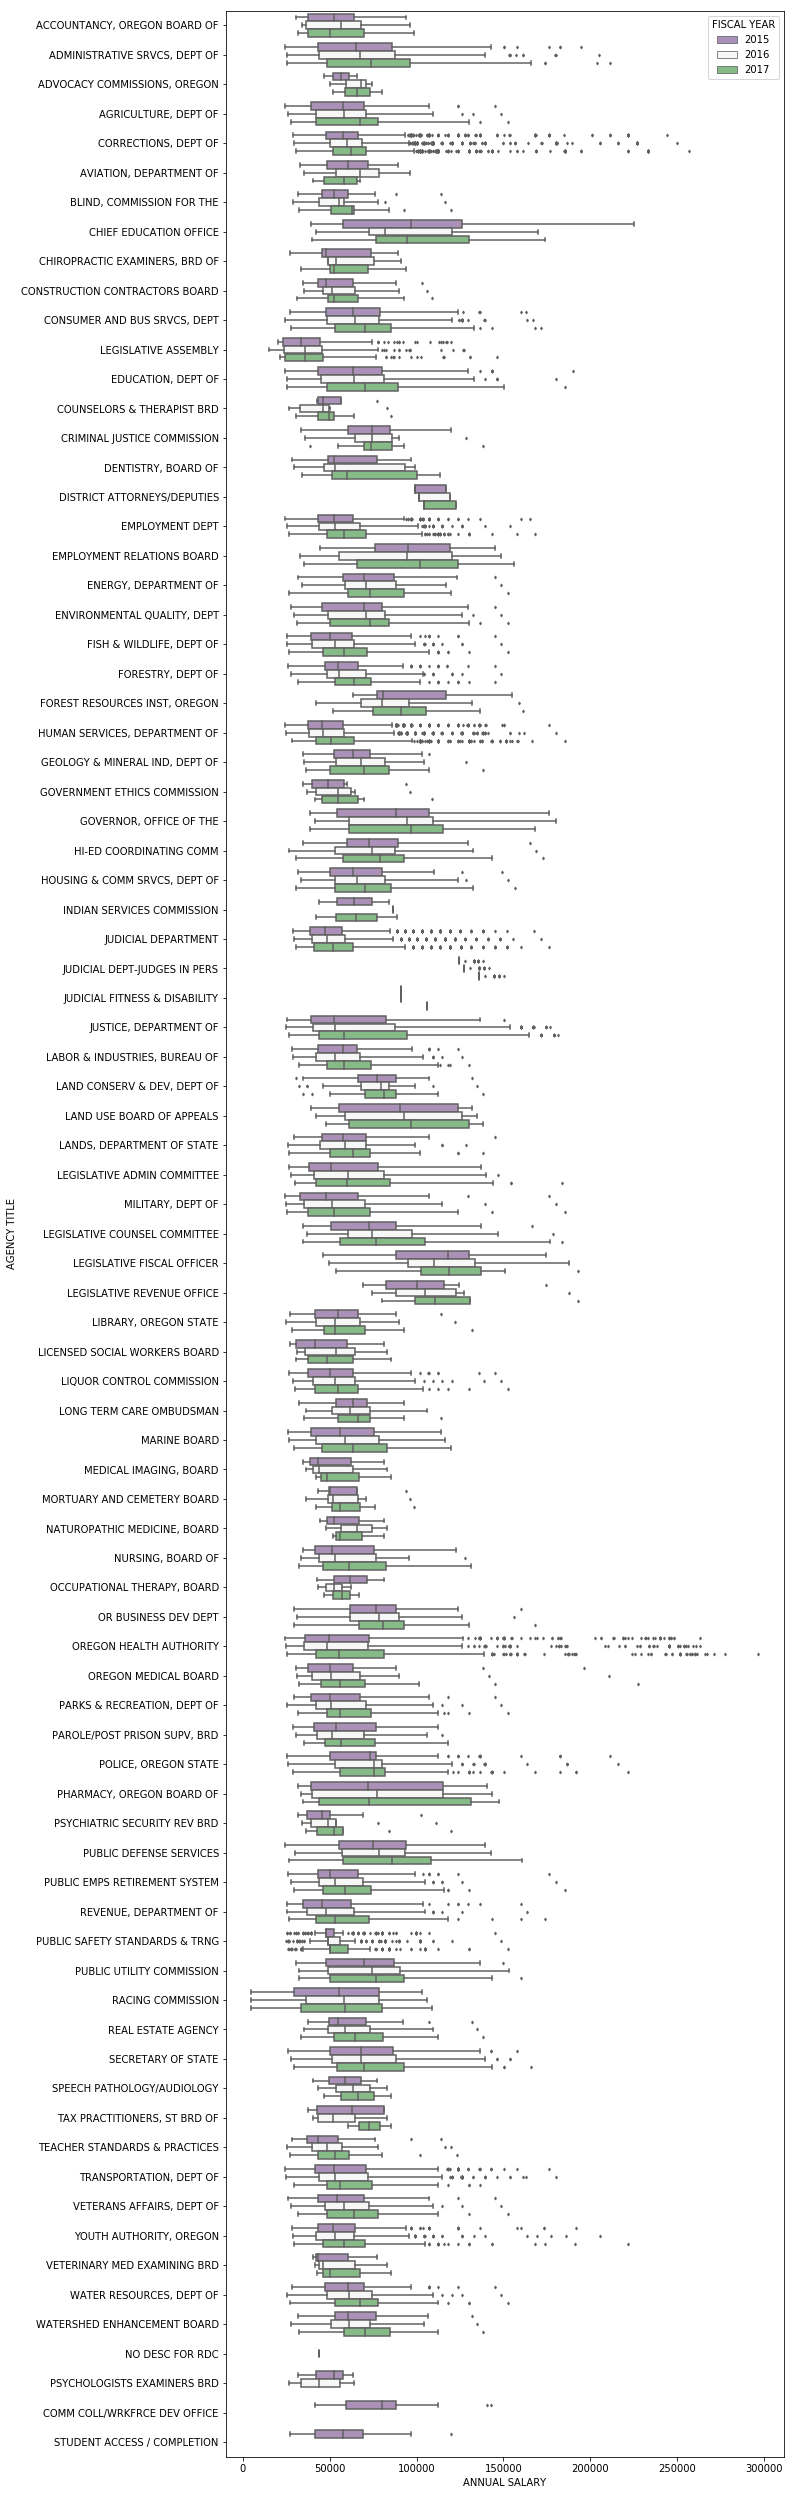

In [171]:
#Aggregate Box Plot showing each agency's salary spending by year
f, ax = plt.subplots(figsize=(10, 45))
sns.boxplot(x='ANNUAL SALARY', y=df['AGENCY TITLE'], data=df, hue = 'FISCAL YEAR',palette="PRGn",fliersize=2.0)



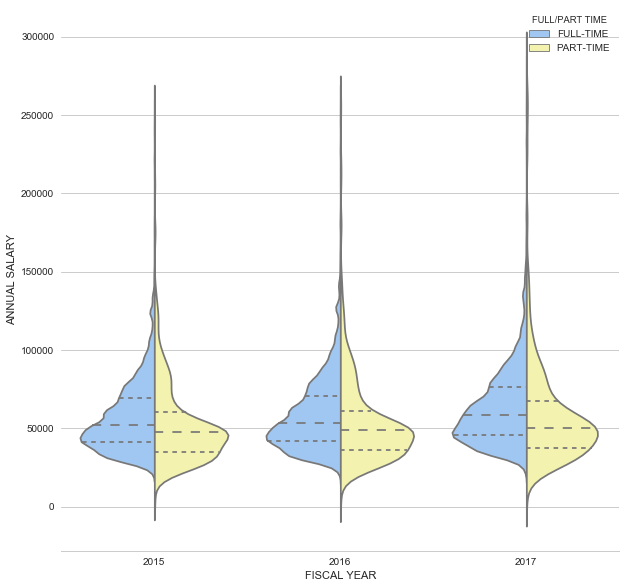

In [179]:
#Distribution of all positions by year.
#This graph excludes Jobs share jobs and only compares full time/ part time job's salary.
f, ax = plt.subplots(figsize=(10, 10))
sns.set(style="whitegrid", palette="pastel", color_codes=True)
sns.violinplot(x="FISCAL YEAR", y= 'ANNUAL SALARY', hue="FULL/PART TIME", data=df[df['FULL/PART TIME']!='JOB-SHARE'], split=True,
               inner="quart", palette={"FULL-TIME": "b", "PART-TIME": "y"})
sns.despine(left=True)





In [202]:

#Lets take a brief look at jobshare positions by agency
Job_share=df[(df['FULL/PART TIME']=='JOB-SHARE')]

Job_share.groupby(['AGENCY TITLE','   AGENCY #','FISCAL YEAR']).agg(['count', 'mean', 'std', 'min', 'median', 'max', 'sum'])

## Three Agencies stand out with having the most Job Share positions.
## Human Services,  Oregon Health Authority, and Department of Corrections.
    #It makes sense that these agencies would employ the most job sharing positions for a few reasons
        #They are the top 3 state agency employers for this data set
        #They are the top 3 state agency total spenders 
            #Given they are the top spenders job share positions are designed to decrease in net-income
            #per-employee

ANNUAL SALARY  \
                                                              count   
AGENCY TITLE                     AGENCY # FISCAL YEAR                 
ADMINISTRATIVE SRVCS, DEPT OF 10700       2015                    2   
                                          2016                    4   
                                          2017                    5   
BLIND, COMMISSION FOR THE     58500       2015                    3   
                                          2016                    4   
                                          2017                    4   
CONSUMER AND BUS SRVCS, DEPT  44000       2015                    3   
                                          2016                    4   
                                          2017                    3   
CORRECTIONS, DEPT OF          29100       2015                   35   
                                          2016                   35   
                                          2017                   29   
EMPLOYMENT DEPT               47100       2015                    9   
                                          2016                    8   
                                          2017                    7   
ENERGY, DEPARTMENT OF         33000       2016                    2   
                                          2017                    1   
ENVIRONMENTAL QUALITY, DEPT   34000       2015                    1   
                                          2016                    1   
FISH & WILDLIFE, DEPT OF      63500       2015                    3   
                                          2016                    2   
                                          2017                    2   
HUMAN SERVICES, DEPARTMENT OF 10000       2015                  131   
                                          2016                  139   
                                          2017                  139   
JUSTICE, DEPARTMENT OF        13700       2015                   17   
                                          2016                   15   
                                          2017                   11   
LANDS, DEPARTMENT OF STATE    14100       2015                    4   
                                          2016                    4   
                                          2017                    4   
LEGISLATIVE ASSEMBLY          15500       2015                    4   
                                          2017                    4   
LIQUOR CONTROL COMMISSION     84500       2015                    4   
                                          2016                    3   
                                          2017                    4   
OR BUSINESS DEV DEPT          12300       2015                    2   
OREGON HEALTH AUTHORITY       44300       2015                   33   
                                          2016                   41   
                                          2017                   49   
PAROLE/POST PRISON SUPV, BRD  25500       2015                    2   
PHARMACY, OREGON BOARD OF     85500       2015                    2   
                                          2016                    2   
                                          2017                    2   
POLICE, OREGON STATE          25700       2015                    3   
                                          2016                    1   
                                          2017                    2   
PUBLIC UTILITY COMMISSION     86000       2015                    1   
                                          2016                    1   
                                          2017                    1   
REVENUE, DEPARTMENT OF        15000       2015                    4   
                                          2016                    4   
                                          2017                    4   
TRANSPORTATION, DEPT OF       73000       2015                    9   
       